<a href="https://colab.research.google.com/github/neimarcos/Mestrado/blob/main/PULP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp
!pip install https://github.com/qdbp/pulp-lparray.git

     - 177 kB 17.5 MB/s
  ERROR: Cannot unpack file /tmp/pip-unpack-cgkv9nyx/pulp-lparray.git (downloaded from /tmp/pip-req-build-00ohblyq, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-00ohblyq


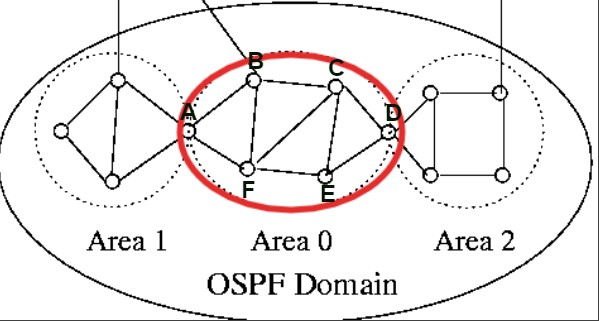

In [ ]:
from IPython.lib.display import FileLinks
"""
"""

# Import PuLP modeler functions
from pulp import *

# Creates a list of all the supply nodes
Routes = ["A", "B", "C","D", "E","F"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A": 2,
          "B": 3,
          "C": 4,
          "D": 2,
          "E": 3,
          "F": 4,}

# Creates a list of all demand nodes
Probes = ["AB", "AF", "BC", "BF", "CD", "CE","CF","DE","EF"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"AB": 1,
          "AF": 1,
          "BC": 1,
          "BF": 1,
          "CD": 1,
          "CE": 1,
          "CF": 1,
          "DE": 1,
          "EF": 1,}

# Creates a list of costs of each  path
costs = [   #Probes
         #"AB", "AF", "BC", "BF", "CD", "CE","CF","DE","EF"
         [2,2,0,0,0,0,0,0,0],#A   routes
         [3,0,3,3,0,0,0,0,0],#B
         [0,0,4,0,4,4,4,0,0],#C
         [0,0,0,0,2,0,0,2,0],#D
         [0,0,0,0,0,3,0,3,3],#E
         [0,4,0,4,0,0,4,0,4],#F
         ]

# Capacidade de processamento disponivel 
CPU = [   #Probes
         #"AB", "AF", "BC", "BF", "CD", "CE","CF","DE","EF"
         [30,2,0,0,0,0,0,0,0],#A   routes
         [3,0,3,3,0,0,0,0,0],#B
         [0,0,4,0,4,4,4,0,0],#C
         [0,0,0,0,2,0,0,2,0],#D
         [0,0,0,0,0,3,0,3,3],#E
         [0,4,0,4,0,0,4,0,4],#F
         ]

#  path
Links = [   #Links ativo
         #"AB", "AF", "BC", "BF", "CD", "CE","CF","DE","EF"
         [1,1,0,0,0,0,0,0,0],#A   routes
         [1,0,1,1,0,0,0,0,0],#B
         [0,0,1,0,1,1,1,0,0],#C
         [0,0,0,0,1,0,0,1,0],#D
         [0,0,0,0,0,1,0,1,1],#E
         [0,1,0,1,0,0,1,0,1],#F
         ]

# The cost data is made into a dictionary
costs = makeDict([Routes,Probes],costs,0)
#print (costs)
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Probes Placement Problem",LpMaximize)


# Creates a list of tuples containing all the possible probes 
#possible_probes = [(w,b) for w in Routes for b in Probes]
#print (possible_probes)
possible_probes = []
possible_probes = [('A','AB'),('A','AF'),('B','AB'),('B','BC'),('B','BF'),('C','BC'),('C','CD'),('C','CE'),('F','EF'),('C','CF'),('D','CD'),('D','DE'),('E','CE'),('E','DE'),('E','EF'),('F','AF'),('F','BF'),('F','CF')]


#print (possible_probes)

#print (possible_probes)
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Routes,Probes),0,None,LpInteger)

# The objective function is added to 'prob' first
#tmp1 = lpSum([vars[w][b]*costs[w][b] for (w,b) in possible_probes])
#tmp2 = lpSum([vars[w][b]*costs[w][b] for (w,b) in possible_probes])
prob +=  lpSum([vars[w][b]*costs[w][b] for (w,b) in possible_probes]), "Sum_of_Transporting_Costs"


# The supply maximum constraints are added to prob for each supply node (routes)
for w in Routes:
    Probes_in_Route = []
    for j in range(9):
      if (Links[Routes.index(w)][j] > 0): 
        Probes_in_Route.append(Probes[j])
    prob += lpSum([vars[w][b] for b in Probes_in_Route])<=supply[w], "Sum_of_Probes_out_of_route_%s"%w

# The demand minimum constraints are added to prob for each demand node (probes)
for b in Probes:
    Probes_in_Route = []
    for j in range(6):
      if (Links[j][Probes.index(b)] > 0): 
        Probes_in_Route.append(Routes[j])
    prob += lpSum([vars[w][b] for w in Probes_in_Route])==demand[b], "Sum_of_Products_into_Bar%s"%b


# The problem data is written to an .lp file
prob.writeLP("ProbesPlacement.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    #if v.varValue > 0:
      print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen    
print("Total Cost = ", value(prob.objective))





Status: Optimal
Route_A_AB = 0.0
Route_A_AF = 0.0
Route_B_AB = 1.0
Route_B_BC = 0.0
Route_B_BF = 0.0
Route_C_BC = 1.0
Route_C_CD = 1.0
Route_C_CE = 1.0
Route_C_CF = 0.0
Route_D_CD = 0.0
Route_D_DE = 0.0
Route_E_CE = 0.0
Route_E_DE = 1.0
Route_E_EF = 0.0
Route_F_AF = 1.0
Route_F_BF = 1.0
Route_F_CF = 1.0
Route_F_EF = 1.0
Total Cost =  34.0


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1313: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
"""
============
Simple graph
============

Draw simple graph with manual layout.
"""

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 6)
G.add_edge(2, 3)
G.add_edge(2, 6)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(3, 6)
G.add_edge(4, 5)
G.add_edge(5, 6)

nx.draw_networkx_nodes(G, pos, nodelist=[0, 1, 2, 3, 4 ,5], node_color="tab:red", **options)


# explicitly set positions
pos = {1: (0,0), 2:(5,3) , 3: (10,3), 4: (15, 0), 5: (10, -3), 6: (5, -3)}

options = {
#    "font_size": 36,
#    "node_size": 3000,
#    "node_color": "white",
#    "edgecolors": "black",
#    "linewidths": 5,
#    "width": 5,
#}
nx.draw_networkx(G, pos, **options)

# some math labels
labelsn = {}
labelsn[0] = r"$A$"
labelsn[1] = r"$B$"
labelsn[2] = r"$C$"
labelsn[3] = r"$D$"
labelsn[4] = r"$E$"
labelsn[5] = r"$F$"

nx.draw_networkx_labels(G, pos, labelsn, font_size=22, font_color="whitesmoke")

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()



SyntaxError: ignored

{0: (0, 0), 1: (5, 3), 2: (10, 3), 3: (15, 0), 4: (10, -3), 5: (5, -3)}


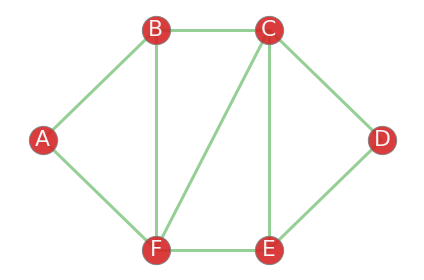

In [ ]:
#!sudo pulptest
import matplotlib.pyplot as plt
import networkx as nx
from networkx.readwrite import json_graph


G = nx.cubical_graph()
#pos = nx.spring_layout(G, seed=3432423433)  # positions for all nodes
pos = {0: (0,0), 1:(5,3) , 2: (10,3), 3: (15, 0), 4: (10, -3), 5: (5, -3)}
print (pos)
# nodes
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=[ 0, 1, 2, 3, 4 ,5], node_color="tab:red", **options)



# edges
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(0, 1),(0, 5),(1, 2),(1, 5),(2, 3),(2, 4),(2, 5),(3, 4),(4, 5)],
    width=3,
    alpha=0.5,
    edge_color="tab:green",
)


#    G,
##    pos,
 #   edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
 #   width=8,
  #  alpha=0.5,
  #  edge_color="tab:blue",
#)



# some math labels
labels = {}
labels[0] = "A"
labels[1] = "B"
labels[2] = "C"
labels[3] = "D"
labels[4] = "E"
labels[5] = "F"


nx.draw_networkx_labels(G, pos, labels, font_size=22, font_color="whitesmoke")

plt.tight_layout()
plt.axis("off")
plt.show()

# Save graph
nx.write_graphml_xml(G,"saida.xml")



In [ ]:
import random
import pulp as plp
import pandas as pd

n = 10
m = 5
set_I = range(1, n+1)
set_J = range(1, m+1)
#computing power capacity of N-PoP i
c = {(i,j): random.normalvariate(0,1) for i in set_I for j in set_J}
#one-way link bandwidth between N-PoPs i and j
a = {(i,j): random.normalvariate(0,5) for i in set_I for j in set_J}

l = {(i,j): random.randint(0,10) for i in set_I for j in set_J}
u = {(i,j): random.randint(10,20) for i in set_I for j in set_J}
b = {j: random.randint(0,30) for j in set_J}

opt_model = plp.LpProblem(name="MIP_Model")

# if x is Continuous
x_vars  = {(i,j):
plp.LpVariable(cat=plp.LpContinuous, 
               lowBound=l[i,j], upBound=u[i,j], 
               name="x_{0}_{1}".format(i,j)) 
for i in set_I for j in set_J}
# if x is Binary
x_vars  = {(i,j):
plp.LpVariable(cat=plp.LpBinary, name="x_{0}_{1}".format(i,j)) 
for i in set_I for j in set_J}
# if x is Integer
x_vars  = {(i,j):
plp.LpVariable(cat=plp.LpInteger, 
               lowBound=l[i,j], upBound= u[i,j],
               name="x_{0}_{1}".format(i,j)) 
for i in set_I for j in set_J}

# Less than equal constraints
constraints = {j : 
plp.LpConstraint(
             e=plp.lpSum(a[i,j] * x_vars[i,j] for i in set_I),
             sense=plp.LpConstraintLE,
             rhs=b[j],
             name="constraint_{0}".format(j))
       for j in set_J}

# >= constraints
constraints = {j : 
plp.LpConstraint(
             e=plp.lpSum(a[i,j] * x_vars[i,j] for i in set_I),
             sense=plp.LpConstraintGE,
             rhs=b[j],
             name="constraint_{0}".format(j))
       for j in set_J}
# == constraints
constraints = {j : 
plp.LpConstraint(
             e=plp.lpSum(a[i,j] * x_vars[i,j] for i in set_I),
             sense=plp.LpConstraintEQ,
             rhs=b[j],
             name="constraint_{0}".format(j))
       for j in set_J}

objective = plp.lpSum(x_vars[i,j] * c[i,j] 
                    for i in set_I 
                    for j in set_J)

# for maximization
opt_model.sense = plp.LpMaximize
# for minimization
#opt_model.sense = plp.LpMinimize
opt_model.setObjective(objective)


prob.writeLP("ProbesControlmax.lp")
# solving with CBC
opt_model.solve()

plp.LpStatus[opt_model.status]

# solving with Glpk
#opt_model.solve(solver = GLPK_CMD())


opt_df = pd.DataFrame.from_dict(x_vars, orient="index", columns = ["variable_object"])
opt_df.index = pd.MultiIndex.from_tuples(opt_df.index, names=["column_i", "column_j"])
opt_df.reset_index(inplace=True)

opt_df["solution_value"] = opt_df["variable_object"].apply(lambda item: item.varValue)
opt_df.drop(columns=["variable_object"], inplace=True)
opt_df.to_csv("./optimization_solution.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install matplotlib
!pip install networkx
!pip install pulp

     |████████████████████████████████| 40.6 MB 33 kB/s 


Resolução do problema do caixeiro viajante com o PuLP 

https://stackoverflow.com/questions/48733667/shortest-path-lp-formulation-reverse-links-taking-on-value-1

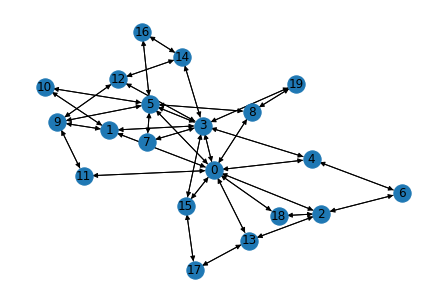

Optimal
4.84
The shortest path is 
(13, 0) 

/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1313: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
import networkx as nx
import pulp
import random
import matplotlib.pyplot as plt

g = nx.to_directed(nx.barabasi_albert_graph(20, 2))
nx.draw(g, with_labels=True)
plt.show()
source = 0
target = 13

dict_d = {}
for i, j in g.edges:
    dict_d[i, j] = dict_d[j, i] = round(random.uniform(1.0, 20.0), 2)

nx.set_edge_attributes(g, dict_d, 'delay')

# instantiate
prob = pulp.LpProblem("Shortest Path Problem", pulp.LpMinimize)
cost = nx.get_edge_attributes(g, 'delay')

# binary variable to state a link is chosen or not
var_dict = {}
for (i, j) in g.edges:
    x = pulp.LpVariable("x_(%s_%s)" % (i,j), cat=pulp.LpBinary)
    var_dict[i, j] = x

# objective function
prob += pulp.lpSum([cost[i, j] * var_dict[i, j] for i, j in g.edges]), "Total Hop Count"

# constraints
for node in g.nodes:
    if node == source:
        prob += pulp.lpSum([var_dict[i, k] for i, k in g.edges if k == node]) - \
                pulp.lpSum([var_dict[k, j] for k, j in g.edges if k == node]) == 1
    elif node == target:
        prob += pulp.lpSum([var_dict[i, k] for i, k in g.edges if k == node]) - \
                pulp.lpSum([var_dict[k, j] for k, j in g.edges if k == node]) == -1
    else:
        prob += pulp.lpSum([var_dict[i, k] for i, k in g.edges if k == node]) - \
                pulp.lpSum([var_dict[k, j] for k, j in g.edges if k == node]) == 0

# solve
#prob.solve(pulp.GUROBI_CMD(msg=0))
prob.solve()

print(pulp.LpStatus[prob.status])
print(pulp.value(prob.objective))
print("The shortest path is ")
for link in g.edges:
    if var_dict[link].value() == 1.0:
        print(link, end=" ")

In [ ]:
"""
Transcrição da modelagem de Chaudet,C. para o monitoramento ativo modificado para as arestas virtuais.
Chaudet, Claude, et al. "Optimal positioning of active and passive monitoring devices." 
Proceedings of the 2005 ACM conference on Emerging network experiment and technology. 2005.

"""
#import random
#import networkx as nx
import pulp

#---------------
# Definição do grafo inicial
# Vertices
#    A  B  C  D
v = [1, 2, 3, 4]

"""
AC = AB + BC
CA = BA + CB
AD = AB + BD
DA = BA + DB
CD = CB + BD
DC = BC + DB
"""

# Arestas virtuais
#      AC     CA     AD     DA     CD     DC
ev = [(1,3), (3,1), (1,4), (4,1), (3,4), (4,3)]

# Composição das arestas virtuais
cv = {
		(1,3): [(1,2),(2,3)],
		(3,1): [(2,1),(3,2)],
		(1,4): [(1,2),(2,4)],
		(4,1): [(2,1),(4,2)],
		(3,4): [(3,2),(2,4)],
		(4,3): [(4,2),(2,3)]
}

# Arestas reais
#      AB     BA     BD     DB     BC     CB
er = [(1,2), (2,1), (2,4), (4,2), (2,3), (3,2)]

# Arestas consideradas
#! e = er
#! e = ev
e = er + ev 
#------------
# alpha = constante de decisão
# Considera-se que todas as arestas virtuais (paths) são compostas pelo mesmo número de arestas reais
# ou todos os paths tem o mesmo comprimento. (2)
# TODO Refazer a rotina com arestas virtuais de tamanho variável
# Considerando que todos os paths tem o mesmo comprimento, observou-se que quando:
# - alpha é igual a 0 não há sondas na rede
# - alpha é menor que o número de arestas reais que compõem a aresta virtual a tendência é ter sondas somente no nó central (B)
# - alpha é igual ao número de arestas reais que compõem a aresta virtual (2) a tendência é haver sondas em todos os nós da rede
alpha = 1
#------------

# Inicialização do problema
prob = pulp.LpProblem("Active_Monitoring_-_Chaudet,_C.", pulp.LpMinimize)

# Dicionario das variaveis de decisão
# yi = Indica se há sonda na aresta (i,j) 
var_dict = {}
for (i, j) in e:
    yi = pulp.LpVariable("yi_(%s_%s)" % (i,j), cat=pulp.LpBinary)
    var_dict[i, j] = yi

# Função objetiva
prob += pulp.lpSum([var_dict[i, j] for i, j in e]), "Total de Sondas na Rede"

# Para todas as arestas
for (i,j) in e:
	# Se uma aresta (i,j) for virtual
	if (i,j) in ev:
		# Restringe que não é possível ter "sondas" na aresta virtual
		prob += var_dict[i,j] + var_dict[j,i] == 0
		for k,l in cv.items():
			if (i,j) == k:
				# Exige que o número de sondas seja igual ao número de arestas que compõem a aresta virtual 
				prob += var_dict[l[0][0],l[0][1]] + var_dict[l[1][0],l[1][1]] >= alpha
	#else:
	#	prob += var_dict[i,j] + var_dict[j,i] >= 1

prob.writeLP("Chaudet.lp")
prob.solve()

for v in prob.variables():
    print(v.name, "=", v.varValue)


yi_(1_2) = 0.0
yi_(1_3) = 0.0
yi_(1_4) = 0.0
yi_(2_1) = 1.0
yi_(2_3) = 1.0
yi_(2_4) = 1.0
yi_(3_1) = 0.0
yi_(3_2) = 0.0
yi_(3_4) = 0.0
yi_(4_1) = 0.0
yi_(4_2) = 0.0
yi_(4_3) = 0.0


In [ ]:
import networkx as nx

RNP = nx.read_graphml('/content/Rnp.graphml.xml')
Geant = nx.read_graphml('/content/Geant2012.graphml.xml')

Bet_rnp = nx.betweenness_centrality(RNP)
Bet_geant = nx.betweenness_centrality(Geant)


FileNotFoundError: ignored